In [1]:
import numpy as np

X_train = np.loadtxt("X_train.csv",
                     delimiter=",", dtype='float64')
X_val = np.loadtxt("X_val.csv",
                   delimiter=",", dtype='float64')
X_test = np.loadtxt("X_test.csv",
                     delimiter=",", dtype='float64')
y_train = np.loadtxt("y_train.csv",
                     delimiter=",", dtype='float64').reshape(-1, 1)
y_val = np.loadtxt("y_val.csv",
                   delimiter=",", dtype='float64').reshape(-1, 1)
y_test = np.loadtxt("y_test.csv",
                    delimiter=",", dtype='float64').reshape(-1, 1)

print("Training Data: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Training Data:  (5000, 50) (5000, 1) (5000, 50) (5000, 1)


In [2]:
import rfm  

model = rfm.RFM()
model = model.fit(X_train, y_train, num_iters=5, reg=0, centering=True, verbose=True)

Starting Iteration: 0
Solved Kernel Regression in 1.539015769958496 seconds.
Computed Gradients in 1.1044368743896484 seconds.


100%|████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11641.31it/s]

Computed EGOP in 0.024164915084838867 seconds.
Starting Iteration: 1


Solved Kernel Regression in 1.5274779796600342 seconds.
Computed Gradients in 1.1096441745758057 seconds.


100%|████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11389.92it/s]

Computed EGOP in 0.023934125900268555 seconds.
Starting Iteration: 2


Solved Kernel Regression in 1.4474639892578125 seconds.
Computed Gradients in 1.10329270362854 seconds.


100%|████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11684.85it/s]

Computed EGOP in 0.02339005470275879 seconds.
Starting Iteration: 3


Solved Kernel Regression in 1.4886071681976318 seconds.
Computed Gradients in 1.1132352352142334 seconds.


100%|████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11437.06it/s]

Computed EGOP in 0.02383708953857422 seconds.
Starting Iteration: 4


Solved Kernel Regression in 1.6433119773864746 seconds.
Computed Gradients in 1.1161220073699951 seconds.


100%|████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 11542.77it/s]

Computed EGOP in 0.024013996124267578 seconds.


Solved Final Kernel Regression in 1.4018840789794922 seconds.


In [3]:
from sklearn.metrics import r2_score

val_preds = model.predict(X_val)
val_r2 = r2_score(y_val.reshape(-1), val_preds.reshape(-1))

preds = model.predict(X_test)
test_r2 = r2_score(y_test.reshape(-1), preds.reshape(-1))
print("Val R2: ", round(val_r2, 4))
print("Test r2: ", round(test_r2, 4))

Val R2:  0.9982
Test r2:  0.9603


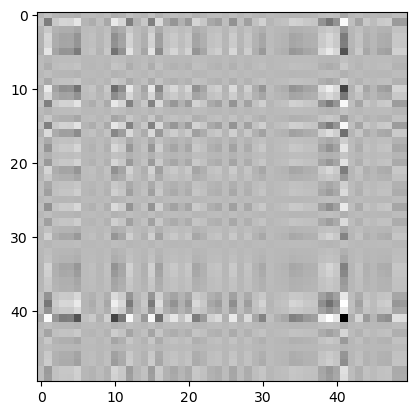

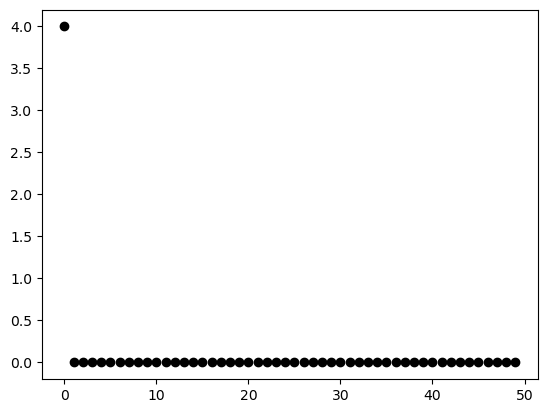

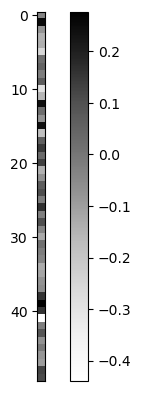

In [4]:
import matplotlib.pyplot as plt
from numpy.linalg import svd

M = model.get_M()
U, s, Vt = svd(M)
u = U[:, 0:1]
plt.imshow(M, cmap='Greys')
plt.show()

plt.plot(list(np.arange(len(s))), s, 'ko')
plt.show()

plt.imshow(u, cmap='Greys')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.colorbar()
plt.show()

In [5]:
model_t = rfm.RFM()
model_t = model_t.fit(X_train @ u, y_train, num_iters=0, reg=0, centering=True, verbose=False)

In [6]:
from sklearn.metrics import r2_score

val_preds = model_t.predict(X_val @ u)
val_r2 = r2_score(y_val.reshape(-1), val_preds.reshape(-1))

preds = model_t.predict(X_test @ u)
test_r2 = r2_score(y_test.reshape(-1), preds.reshape(-1))
print("Val R2: ", round(val_r2, 4))
print("Test r2: ", round(test_r2, 4))

Val R2:  0.9961
Test r2:  0.9635
